# Window Macro Code Classification

This notebook demonstrates how to train a model to classify window macro codes as 'white' or 'malformed' using labeled data.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_selection import SelectKBest, chi2



In [2]:
# Read the CSV file containing labeled data
train_data = pd.read_csv("train_dataset.csv", encoding='utf-16-le')
validation_data = pd.read_csv("validation_dataset.csv", encoding='utf-16-le')

# Display the first few rows of the train dataset
print("Shape of train data:", train_data.shape)
train_data.head()

# Display the first few rows of the validation dataset
print("Shape of validation data:", validation_data.shape)
validation_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train_dataset.csv'

In [ ]:
# Split the train dataset into features (X) and target variable (y)
X_train = train_data['vba_code']
y_train = train_data['label']

X_validation = validation_data['vba_code']
y_validation = validation_data['label']

# Preprocess the text data using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,3), 
                             stop_words='english', 
                             max_features=100000,
                             sublinear_tf=True, 
                             min_df=5,  
                             smooth_idf=True,
                                norm='l2'
                            )
X_train_tfidf = vectorizer.fit_transform(X_train)
X_validation_tfidf = vectorizer.transform(X_validation)

k_best = SelectKBest(score_func=chi2, k=3500)
X_train_selected = k_best.fit_transform(X_train_tfidf, y_train)
X_validation_selected = k_best.transform(X_validation_tfidf)


In [ ]:
# Create a Random Forest model

model = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=42)


In [ ]:
# Get model accuracy based on best tuning for validation dataset
model.fit(X_train_selected, y_train)
y_validation_pred = model.predict(X_validation_selected)
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print("Validation Accuracy:", validation_accuracy)


Validation Accuracy: 0.9966130397967824


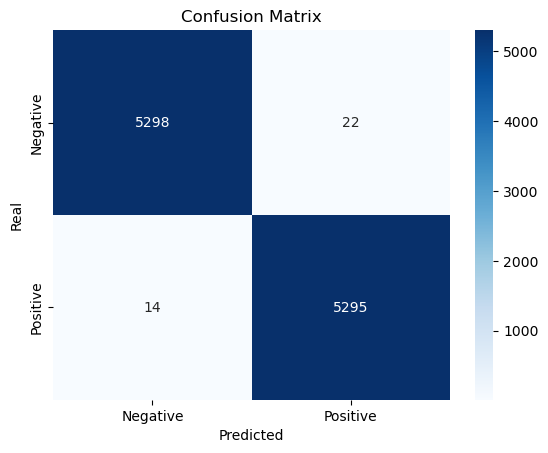

Validation Precision: 0.9959


In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_validation, y_validation_pred)

# Display the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

validation_precision = precision_score(y_validation, y_validation_pred,pos_label='white')
print(f'Validation Precision: {validation_precision:.4f}')


In [ ]:
# Save trained model
pickle.dump(model, open('trained_model.pkl', 'wb'))
# Save trained vectorizer
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

# Save trained selectkbest
pickle.dump(k_best, open('k_best.pkl', 'wb'))

In [ ]:
# Use the model to predict new VBA code
def predict_vba_code(new_code):
    new_code_tfidf = vectorizer.transform([new_code])
    new_code_selected = k_best.transform(new_code_tfidf)
    prediction = model.predict(new_code_selected)
    return prediction[0]

# Example usage
new_code = "Private Sub ExampleMacro()"
prediction = predict_vba_code(new_code)
print("Prediction:", prediction)


Prediction: white
